In [1]:
import csv
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import BallTree
from sklearn.cluster import KMeans

In [2]:
trainFile1 = "/home/chathur/Documents/CS5691/assign2/dbscan/train_data.csv"
trainFile2 = "/home/chathur/Documents/CS5691/assign2/dbscan/train_data_2.csv"

tempData = []
with open(trainFile1) as file_obj:
    reader_obj = csv.reader(file_obj)
    for row in reader_obj:
        tempList = []
        for s in row:
          tempList.append(float(s))
        tempData.append(tempList)

trainData1 = np.array(tempData)
trainData1 = trainData1[1:, :]

tempData = []
with open(trainFile2) as file_obj:
    reader_obj = csv.reader(file_obj)
    for row in reader_obj:
        tempList = []
        for s in row:
          tempList.append(float(s))
        tempData.append(tempList)

trainData2 = np.array(tempData)
trainData2 = trainData2[1:, :]

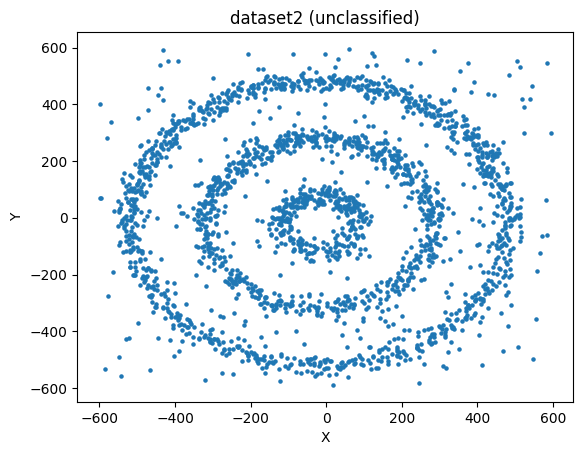

In [3]:
plt.scatter(trainData1[:, [0]], trainData1[:, [1]], s=5)
plt.xlabel("X")
plt.ylabel("Y")
plt.title('dataset2 (unclassified)')
plt.show()

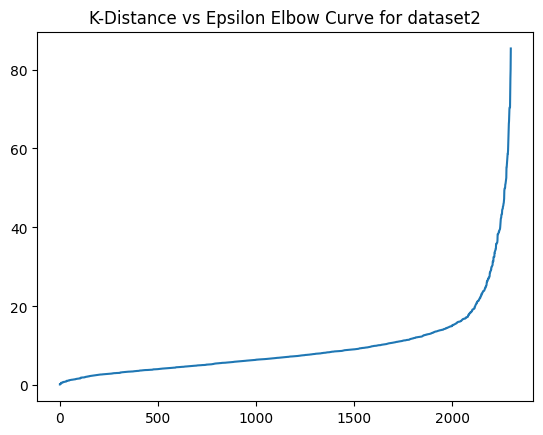

In [4]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(trainData1)
distances, indices = neighbors_fit.kneighbors(trainData1)

plt.plot(np.sort(distances[:,1]))
plt.title('K-Distance vs Epsilon Elbow Curve for dataset2')
plt.show()

In [5]:
def dbscan(input, epsilon, minPts):
    clusters = []

    points = set()
    for i in range(len(input)):
        points.add(i)

    tree = BallTree(input)

    for i in range(len(input)):
        if i not in points:
            continue
        queue = tree.query_radius(input[[i], :], r=epsilon)[0]
        if len(queue) < minPts+1:
            continue
        points.remove(i)
        cluster = np.copy(input[[i], :])
        while len(queue):
            cur = queue[0]
            queue = queue[1:len(queue)]
            if cur not in points:
                continue
            cluster = np.append(cluster, input[[cur], :], axis=0)
            points.remove(cur)
            subqueue = tree.query_radius(input[[cur], :], r=epsilon)[0]
            if len(subqueue) < minPts:
                continue
            addqueue = []
            for k in subqueue:
                if k in points:
                    addqueue.append(k)
            if len(addqueue):
                queue = np.append(queue, np.array(addqueue))
        clusters.append(cluster)

    if len(points):
        cluster = []
        for i in points:
            cluster.append(input[i])
        clusters.append(np.array(cluster))
    return clusters

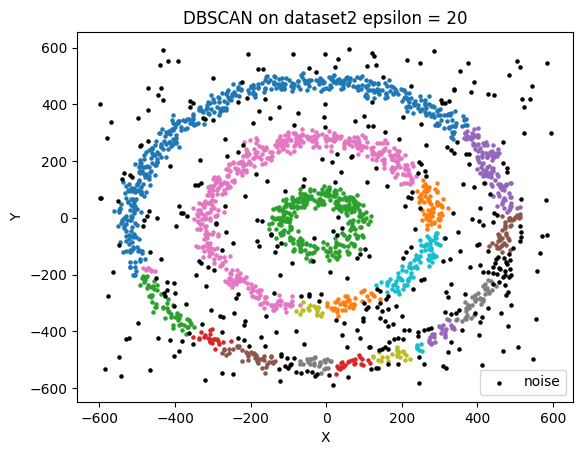

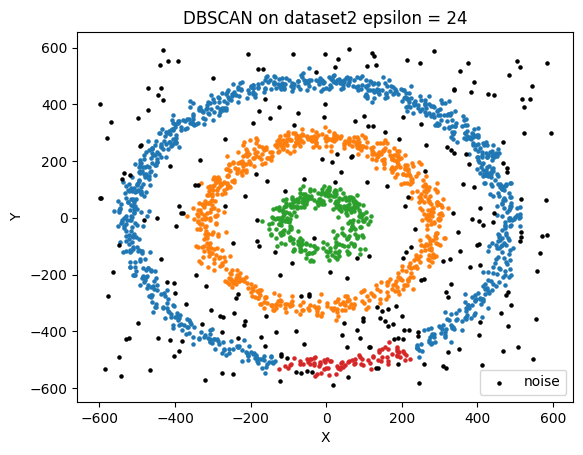

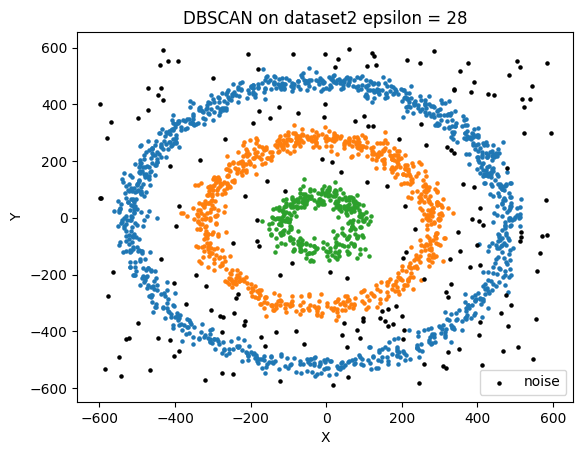

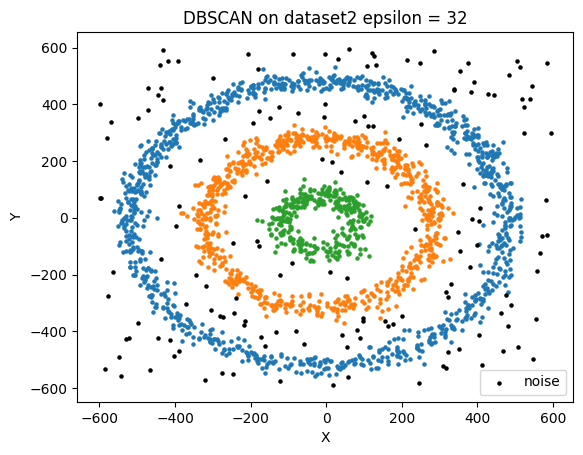

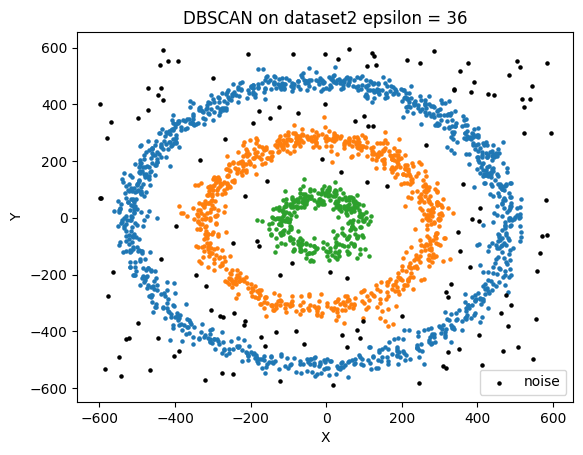

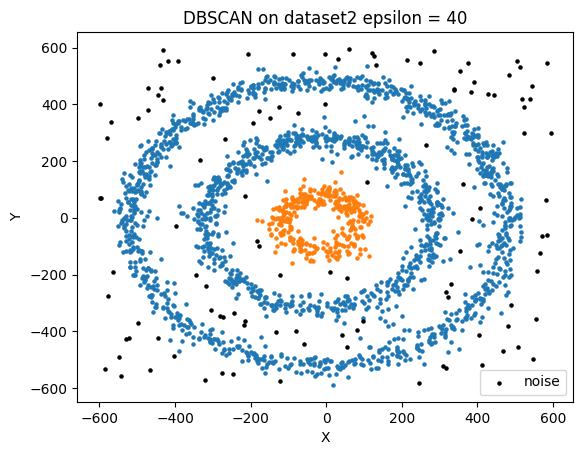

In [6]:
for i in range(20, 41, 4):
    fig = plt.figure()
    clusters = dbscan(trainData1, i, 5)

    for j in range(len(clusters)-1):
        plt.scatter(clusters[j][:, [0]], clusters[j][:, [1]], s=5)
    plt.scatter(clusters[len(clusters)-1][:, [0]], clusters[len(clusters)-1][:, [1]], s=5, c='black', label='noise')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.title("DBSCAN on dataset2 epsilon = "+str(i))
    plt.show()

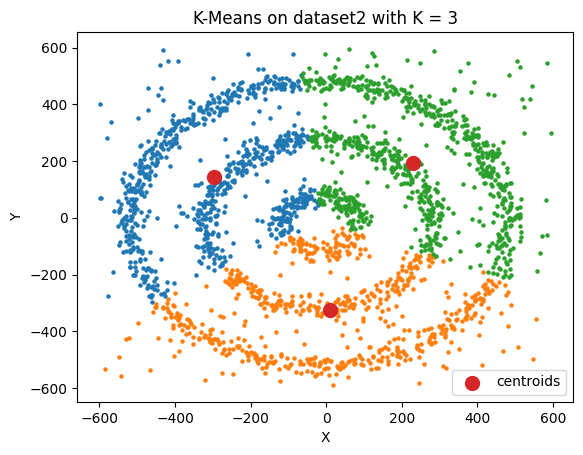

In [7]:
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300).fit(trainData1)
clstrs = km.labels_
centroids = km.cluster_centers_

clusters = []

for i in range(3):
    cluster = []
    for j in range(len(clstrs)):
        if clstrs[j] == i:
            cluster.append(trainData1[j])
    clusters.append(np.array(cluster))

for i in range(len(clusters)):
    plt.scatter(clusters[i][:, [0]], clusters[i][:, [1]], s=5)
plt.scatter(centroids[:, [0]], centroids[:, [1]], label='centroids', s=100)
plt.legend()
plt.title("K-Means on dataset2 with K = 3")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

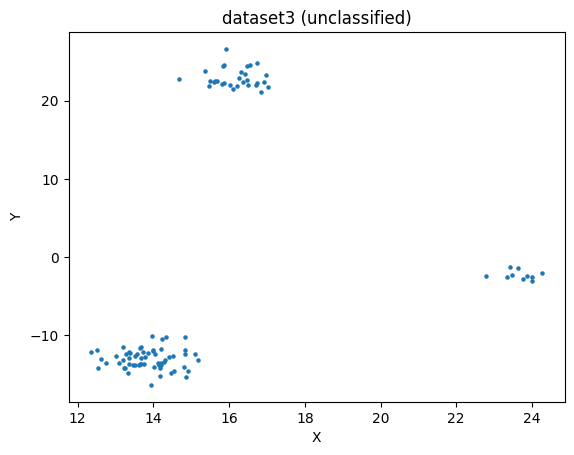

In [8]:
plt.scatter(trainData2[:, [0]], trainData2[:, [1]], s=5)
plt.xlabel("X")
plt.ylabel("Y")
plt.title('dataset3 (unclassified)')
plt.show()

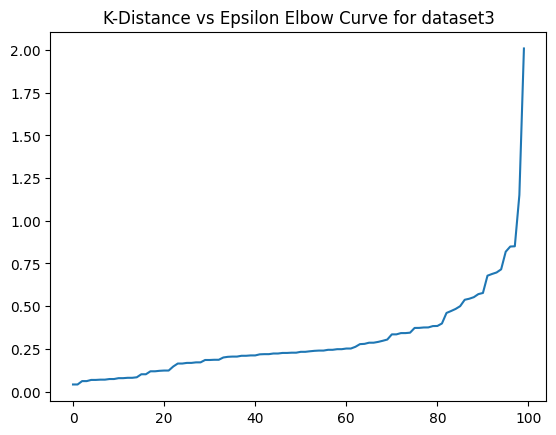

In [9]:
neighbors = NearestNeighbors(n_neighbors=2)
neighbors_fit = neighbors.fit(trainData2)
distances, indices = neighbors_fit.kneighbors(trainData2)

plt.plot(np.sort(distances[:,1]))
plt.title('K-Distance vs Epsilon Elbow Curve for dataset3')
plt.show()

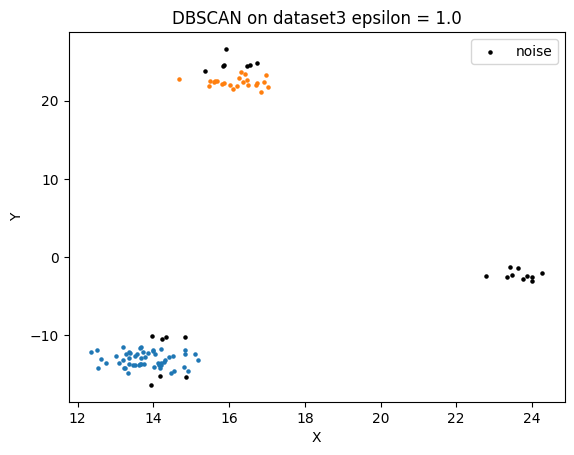

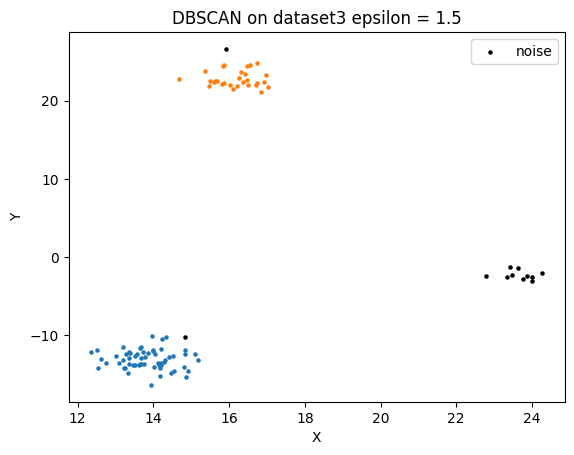

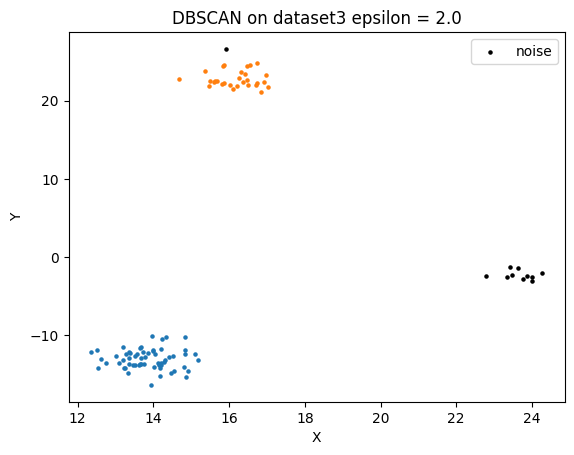

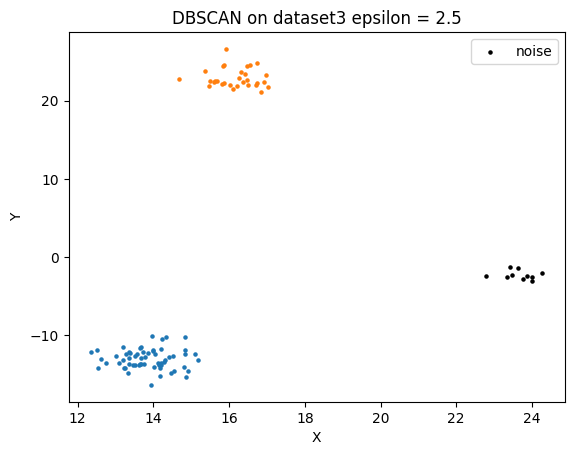

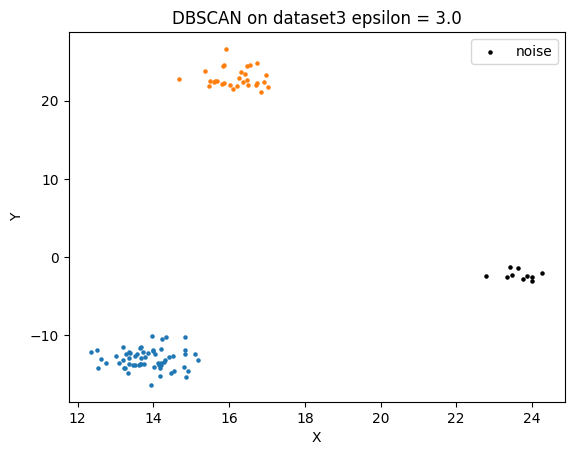

In [10]:
for i in range(10, 31, 5):
    fig = plt.figure()
    clusters = dbscan(trainData2, i/10, 15)

    for j in range(len(clusters)-1):
        plt.scatter(clusters[j][:, [0]], clusters[j][:, [1]], s=5)
    plt.scatter(clusters[len(clusters)-1][:, [0]], clusters[len(clusters)-1][:, [1]], s=5, c='black', label='noise')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.title("DBSCAN on dataset3 epsilon = "+str(i/10))
    plt.show()

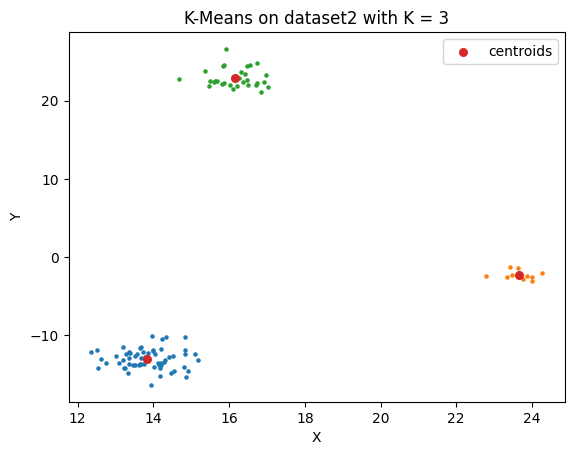

In [11]:
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300).fit(trainData2)
clstrs = km.labels_
centroids = km.cluster_centers_

clusters = []

for i in range(3):
    cluster = []
    for j in range(len(clstrs)):
        if clstrs[j] == i:
            cluster.append(trainData2[j])
    clusters.append(np.array(cluster))

for i in range(len(clusters)):
    plt.scatter(clusters[i][:, [0]], clusters[i][:, [1]], s=5)
plt.scatter(centroids[:, [0]], centroids[:, [1]], label='centroids', s=30)
plt.legend()
plt.title("K-Means on dataset2 with K = 3")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()